## 0-1 Seabornの導入

In [1]:
import piplite
import pyodide
await piplite.install("seaborn")

import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


最初の設定なので必ず上のコードを回す

In [2]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/covidGDP.csv"))
data.head()

,Entity,Code,Confirmed,GDP,Continent
0,Afghanistan,AFG,29.521,1803.987487,Asia
1,Albania,ALB,230.775,11803.430594,Europe
2,Algeria,DZA,67.396,13913.839363,Africa
3,Angola,AGO,0.737,5819.494971,Africa
4,Antigua and Barbuda,ATG,243.092,21490.942659,North America


前回のコロナ禍のデータで、累積感染者数とGDPの関係性を考えよう

<AxesSubplot:xlabel='Confirmed', ylabel='GDP'>

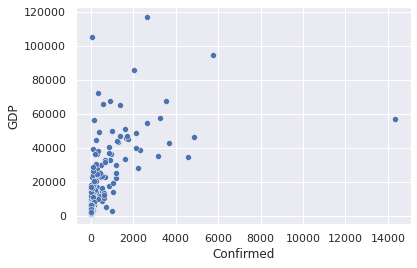

In [3]:
sns.scatterplot(data = data, x = "Confirmed", y = "GDP")

Seabornパッケージのヒストグラムを描く関数はscatterplotで、基本的にsns.scatterplot(data=データの名前, x=横軸に描きたい変数の名前, y=縦軸に描きたい変数の名前)である

<AxesSubplot:xlabel='GDP', ylabel='Confirmed'>

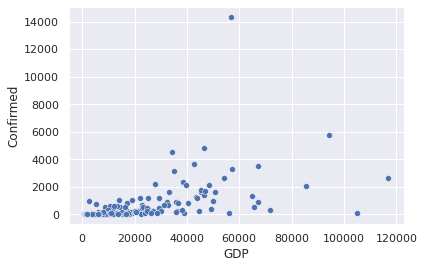

In [4]:
sns.scatterplot(data = data, x = "GDP", y = "Confirmed")

横軸と縦軸を置き換えて描いてもいい

<AxesSubplot:xlabel='Confirmed', ylabel='GDP'>

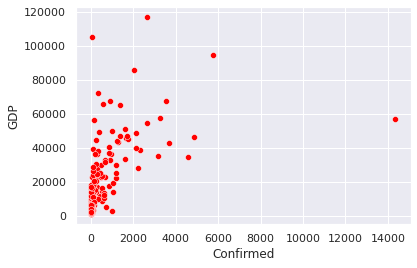

In [5]:
sns.scatterplot(data = data, x = "Confirmed", y = "GDP", color = "red")

色を変えることも出来る

<AxesSubplot:xlabel='Confirmed', ylabel='GDP'>

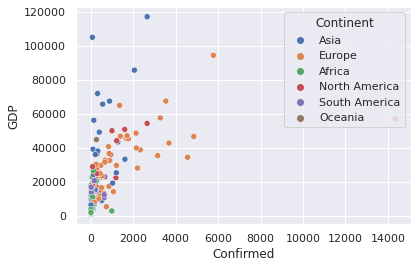

In [6]:
sns.scatterplot(data = data, x = "Confirmed", y = "GDP", hue = "Continent")

グループ別に色を分けるには、hueオプションを利用する

<AxesSubplot:xlabel='Confirmed', ylabel='GDP'>

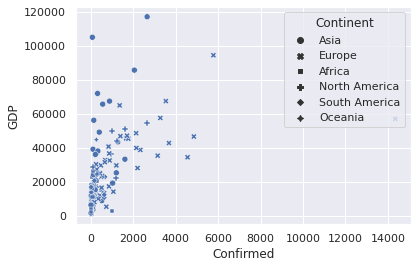

In [7]:
sns.scatterplot(data = data, x = "Confirmed", y = "GDP", style = "Continent")


グループ別に点の形を変えるには、styleオプションを利用する

## 0-2 プロットの設定

Text(0, 0.5, 'GDP per capita')

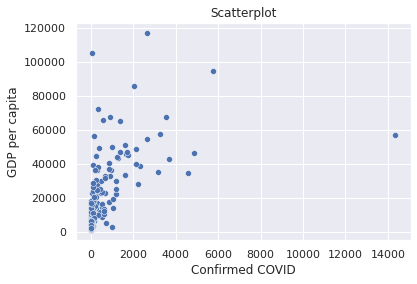

In [8]:
sns.scatterplot(data = data, x = "Confirmed", y = "GDP")
plt.title("Scatterplot")
plt.xlabel("Confirmed COVID")
plt.ylabel("GDP per capita")

- plt.title()でタイトルの設定
- plt.ylabel()で縦軸のラベル設定
- plt.xlabel()で横軸のラベル設定

注意：日本語を対応させるにはものすごくややこしい作業が必要なので、英語だけ使う

## 1. 学校の散布図

In [9]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/mhigh.csv"))
data.head()

,氏名,氏名.カタカナ.,性別,学年,国語,数学,成績合計,身長,体重,クラス
0,住田佳織,スミダカオリ,女,3,91,99,190,154.9,51.2,A
1,野中辰男,ノナカタツオ,男,3,88,94,182,172.8,65.3,A
2,田村比呂志,タムラヒロシ,男,3,99,80,179,171.3,62.4,A
3,南部愛梨,ナンブアイリ,女,3,77,99,176,157.8,54.3,A
4,熊沢悠生,クマザワユウセイ,男,1,88,87,175,168.6,58.8,A


データを読み込んできた。

In [10]:
data.columns = ["name","katakana","sex","grade","japanese","math","sum","height","weight","class"]
data["sex"] = data["sex"].replace({"男":"Male","女":"Female"})
data.head()

,name,katakana,sex,grade,japanese,math,sum,height,weight,class
0,住田佳織,スミダカオリ,Female,3,91,99,190,154.9,51.2,A
1,野中辰男,ノナカタツオ,Male,3,88,94,182,172.8,65.3,A
2,田村比呂志,タムラヒロシ,Male,3,99,80,179,171.3,62.4,A
3,南部愛梨,ナンブアイリ,Female,3,77,99,176,157.8,54.3,A
4,熊沢悠生,クマザワユウセイ,Male,1,88,87,175,168.6,58.8,A


Seabornで日本語を使えないため、全部英語の表記に変えた
- sex: 性別の英語表記(Female:女、Male:男)
- grade: 学年の英語表記
- japanese: 国語の成績
- math: 数学の成績
- sum：　成績の合計
- height: 身長の英語表記
- weight: 体重の英語表記
- class: クラス

<AxesSubplot:xlabel='weight', ylabel='height'>

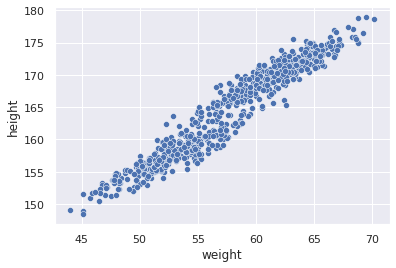

In [11]:
sns.scatterplot(data = data, x = "weight", y = "height")

身長と体重の散布図が完成した

<AxesSubplot:xlabel='weight', ylabel='height'>

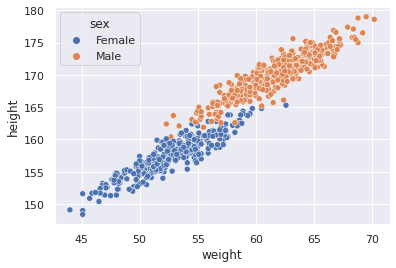

In [12]:
sns.scatterplot(data = data, x = "weight", y = "height", hue = "sex")

学年別に模様も違うものにする

<AxesSubplot:xlabel='math', ylabel='japanese'>

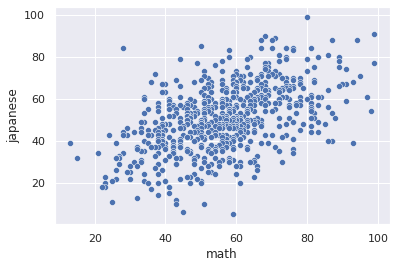

In [13]:
sns.scatterplot(data = data, x = "math", y = "japanese")

今回は成績の散布図を描いてみる

<AxesSubplot:xlabel='math', ylabel='japanese'>

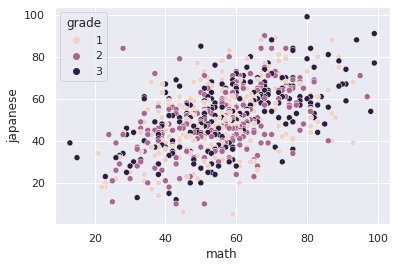

In [14]:
sns.scatterplot(data = data, x = "math", y = "japanese", hue = "grade")

学年で色をつけてみても、学年別の成績の差はないように見える

<AxesSubplot:xlabel='math', ylabel='japanese'>

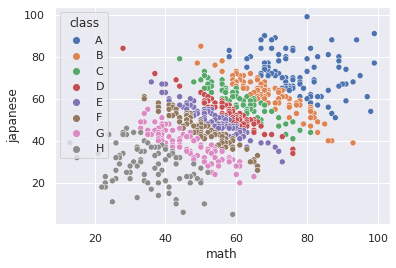

In [15]:
sns.scatterplot(data = data, x = "math", y = "japanese", hue = "class")

点の模様を学年別に変えて、散布図を完成しよう

## 2. あやめの散布図

In [16]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/iris.csv"))
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


irisデータセットは、あやめの種類に関するデータである
- sepal.length: 花のがく片の長さ
- sepal.width: 花のがく片の幅
- petal.length: 花びらの長さ
- petal.width: 花びらの幅
- variety: 花の種類の名前

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

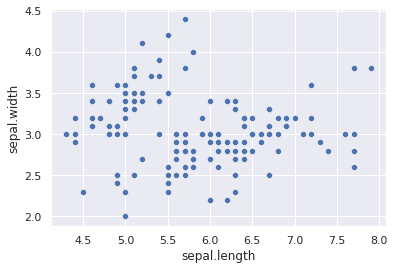

In [17]:
sns.scatterplot(data = data, x = "sepal.length", y = "sepal.width")

花のがく片の散布図である

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

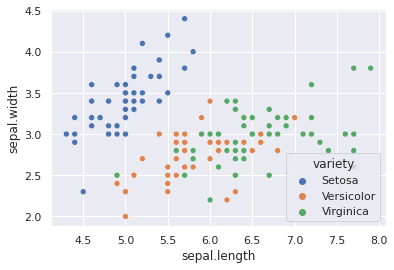

In [18]:
sns.scatterplot(data = data, x = "sepal.length", y = "sepal.width", hue = "variety")

花びらの長さと幅の散布図である

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

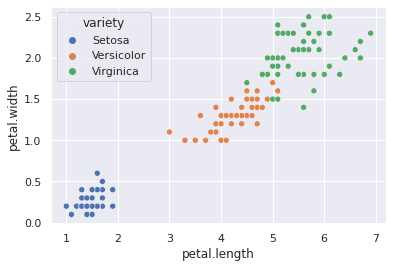

In [19]:
sns.scatterplot(data = data, x = "petal.length", y = "petal.width", hue = "variety")

こちらも種類別に色をつけるとはっきりわかる

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

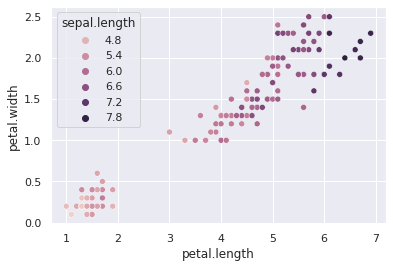

In [20]:
sns.scatterplot(data = data, x = "petal.length", y = "petal.width", hue = "sepal.length")

花のがく片の長さで色付けることで、萼片の長さと花びらの大きさが正の相関を持つことがわかる

## 3. 幸せの散布図

In [21]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/happy.csv"))
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


幸せに関するデータを読み込んだ
- Country: 国名
- Region: 地域
- Happiness Rank: 幸せランキング
- Happiness Score: 幸せスコア
- Economy (GDP per Capita): 経済水準(一人当たりGDPで測った)
- Family: 社会福祉
- Health (Life Expectancy): 期待寿命
- Freedom: 人生の選択における自由度
- Trust (Government Corruption): 政府の透明性
- Generosity: 社会の寛容度
- year: 年(ここでは2015しかない)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

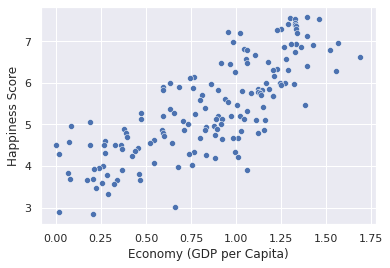

In [22]:
sns.scatterplot(data = data, x = "Economy (GDP per Capita)", y = "Happiness Score")

経済と幸せの相関が強いことが分かる

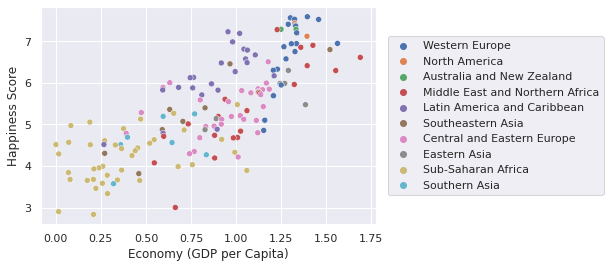

In [23]:
ax = sns.scatterplot(data = data, x = "Economy (GDP per Capita)", y = "Happiness Score", hue = "Region")
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

地域ごとに色づけてみると、このようになる　(2行目のコードはコピペで構わない)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

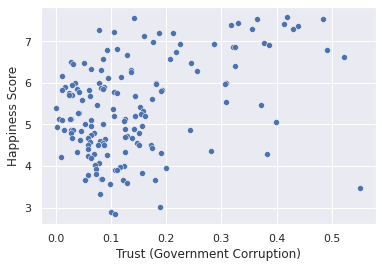

In [24]:
sns.scatterplot(data = data, x = "Trust (Government Corruption)", y = "Happiness Score")

経済とは違って、政府の透明性はあまり幸せと相関がないように見える

In [25]:
data2 = data.melt(id_vars = ["Country","Region","Happiness Score"], value_vars = data.columns[4:9].to_list())
data2.head()

,Country,Region,Happiness Score,variable,value
0,Switzerland,Western Europe,7.587,Economy (GDP per Capita),1.39651
1,Iceland,Western Europe,7.561,Economy (GDP per Capita),1.30232
2,Denmark,Western Europe,7.527,Economy (GDP per Capita),1.32548
3,Norway,Western Europe,7.522,Economy (GDP per Capita),1.45900
4,Canada,North America,7.427,Economy (GDP per Capita),1.32629


いちいち描くとキリがないので、データを描きやすい形にする

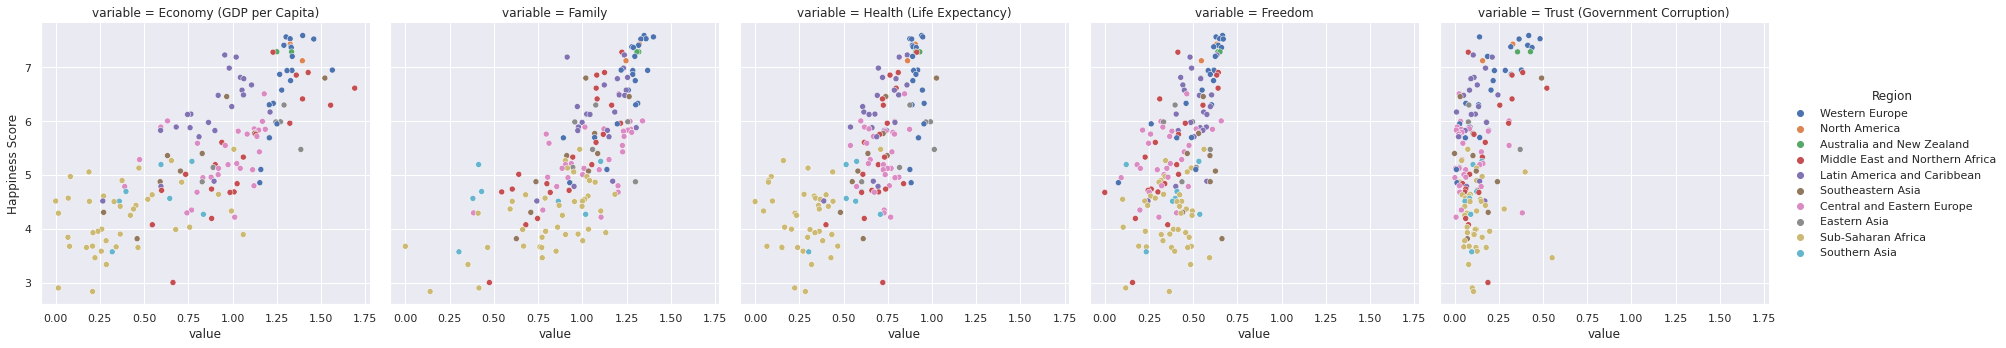

In [26]:
sns.relplot(data=data2, x="value", y="Happiness Score",col="variable",hue="Region",kind="scatter")

このような図の描き方もある(seabornのreplot関数を利用)

経済＞社会福祉＞期待寿命＞人生の自由度＞政府の透明性の順で幸せとの相関が弱くなっていくことがわかる